# Libraries

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import Data

In [2]:
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\iamsouravbanerjee\customer-shopping-trends-dataset\versions\2


In [3]:
df = pd.read_csv('shopping_trends_updated.csv')

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\1673237703.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, orient='v', palette='pastel')  # Vertical boxplot
C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\1673237703.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, orient='v', palette='pastel')  # Vertical boxplot
C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\1673237703.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, orient='v', palette='pastel')  # Vertical boxplot
C

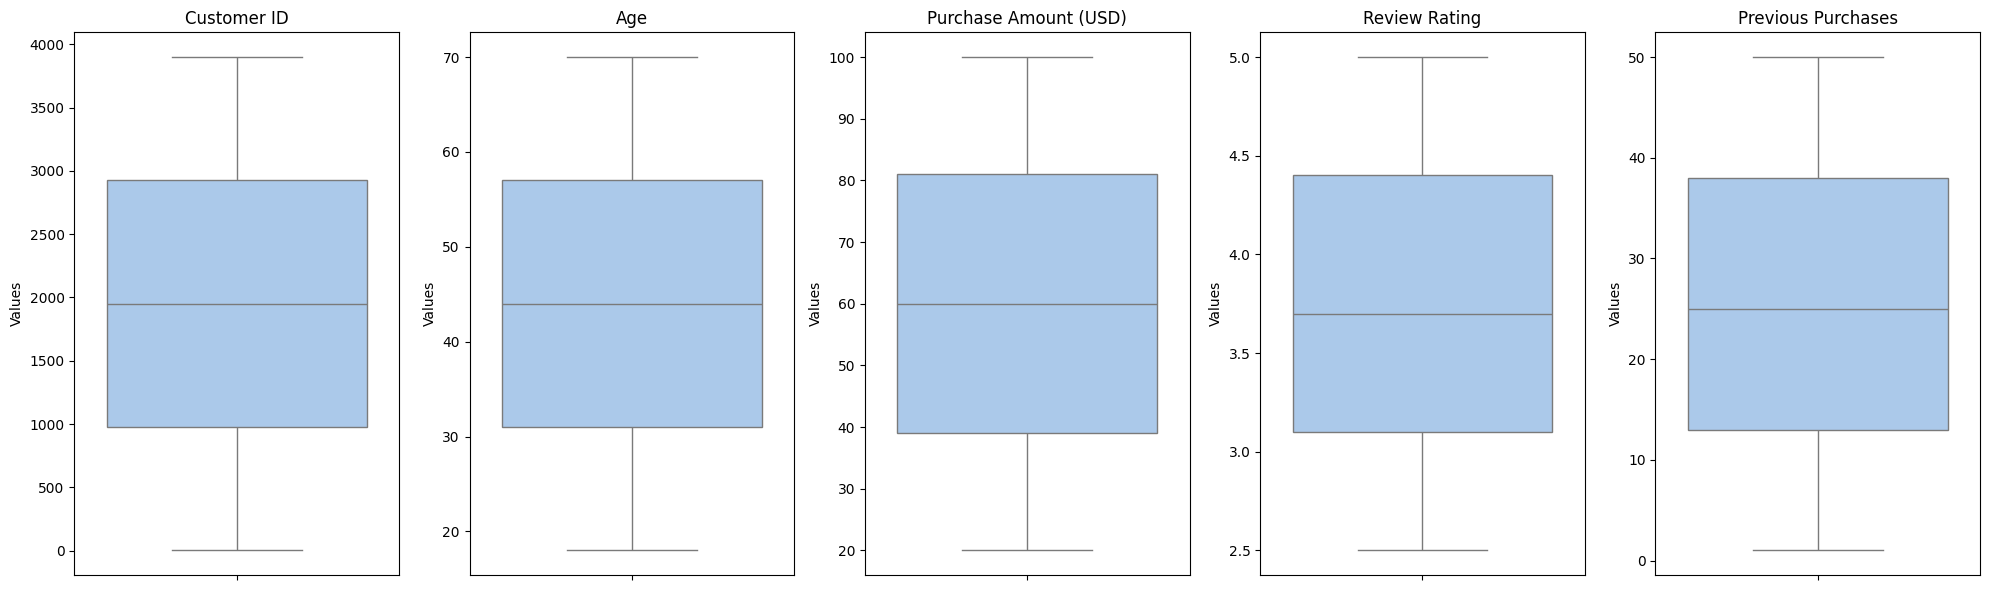

In [8]:
#Checking for outliers

# Filter numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot vertical boxplots in a horizontal alignment
plt.figure(figsize=(len(numerical_columns) * 4, 6))  # Adjust width dynamically
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)  # Subplots in a single row
    sns.boxplot(data=df, y=column, orient='v', palette='pastel')  # Vertical boxplot
    plt.title(f'{column}', fontsize=12)
    plt.ylabel('Values')
    plt.xlabel('')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Vizualizing Demographics

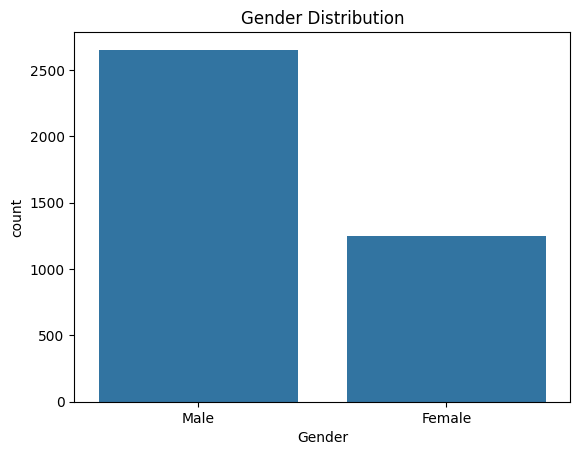

In [9]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

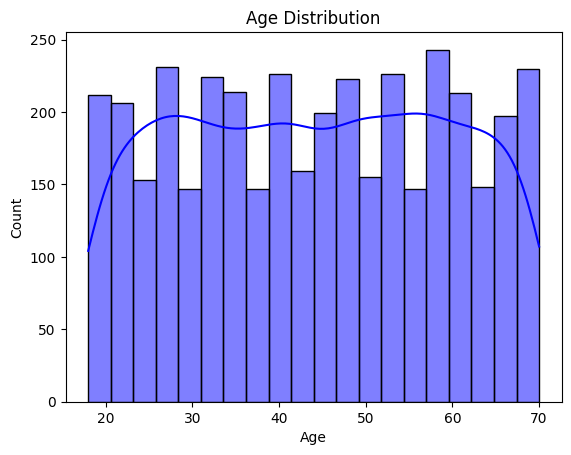

In [10]:
# Age distribution
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\1473812315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Location", order=df["Location"].value_counts().index, palette="viridis")


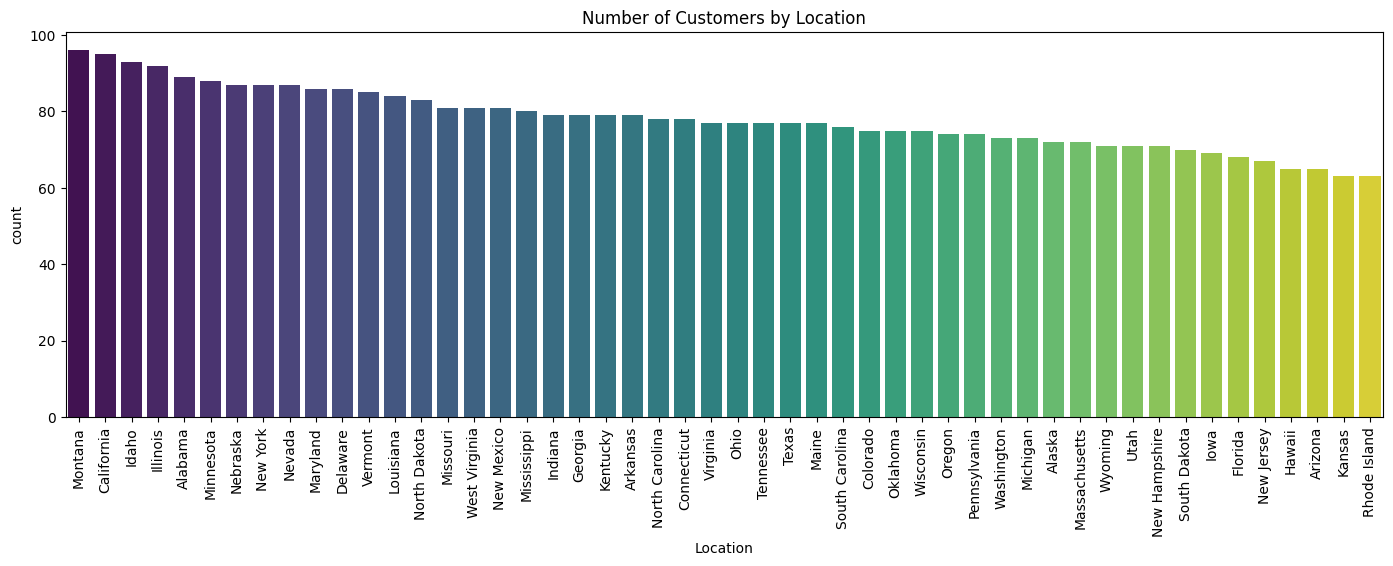

In [11]:
# Number of customers by Location
plt.figure(figsize=(17, 5))
sns.countplot(data=df, x="Location", order=df["Location"].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Number of Customers by Location")
plt.show()

### Spending Behavior Analysis

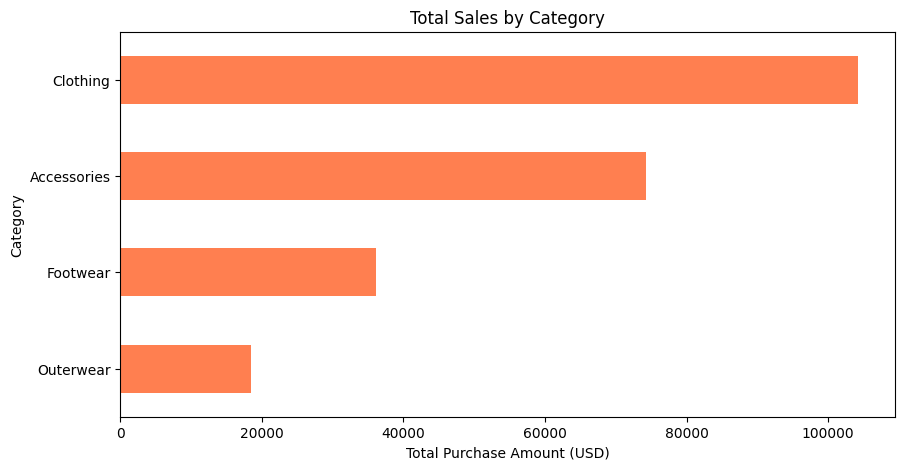

In [12]:
# Total sales by Category
category_sales = df.groupby("Category")["Purchase Amount (USD)"].sum().sort_values()
category_sales.plot(kind="barh", figsize=(10, 5), color="coral")
plt.title("Total Sales by Category")
plt.xlabel("Total Purchase Amount (USD)")
plt.ylabel("Category")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\4003381389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y="Purchase Amount (USD)", data=df, palette="Blues")


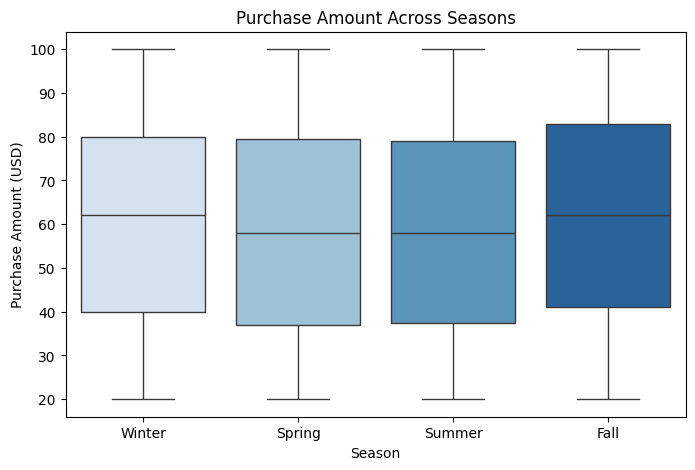

In [13]:
# Purchse amount across seasons
plt.figure(figsize=(8, 5))
sns.boxplot(x="Season", y="Purchase Amount (USD)", data=df, palette="Blues")
plt.title("Purchase Amount Across Seasons")
plt.show()

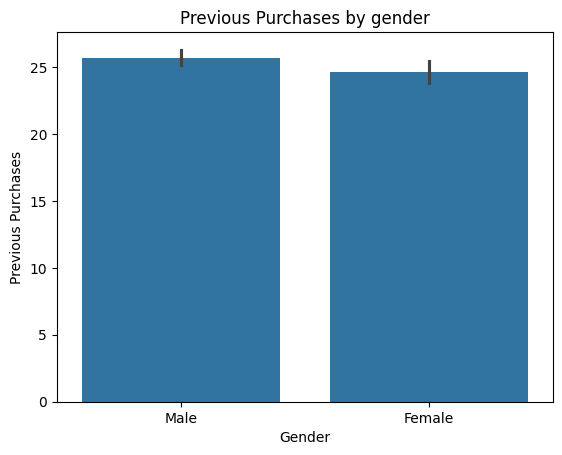

In [14]:
#Previous purchases by gender
sns.barplot(x='Gender', y='Previous Purchases', data=df)
plt.title('Previous Purchases by gender')
plt.show()

### Product Analysis

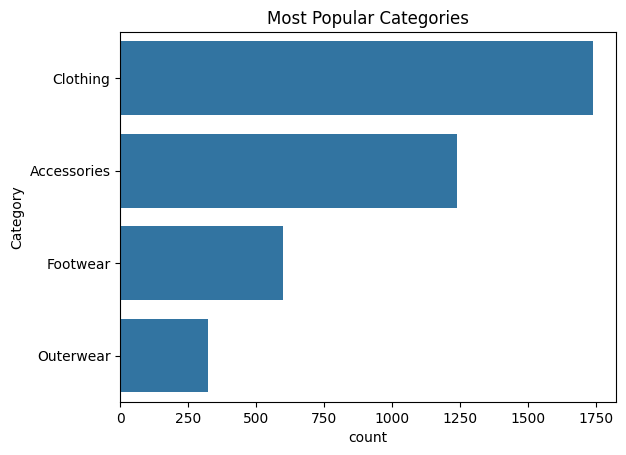

In [15]:
#Most popular product categories
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Most Popular Categories')
plt.show()

<Axes: xlabel='Category', ylabel='count'>

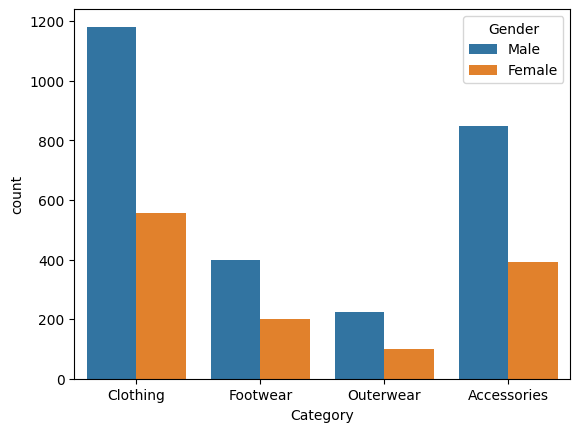

In [16]:
# Most popular category by gender
sns.countplot(x='Category', hue='Gender', data=df)

### Discount and Promo Code Usage

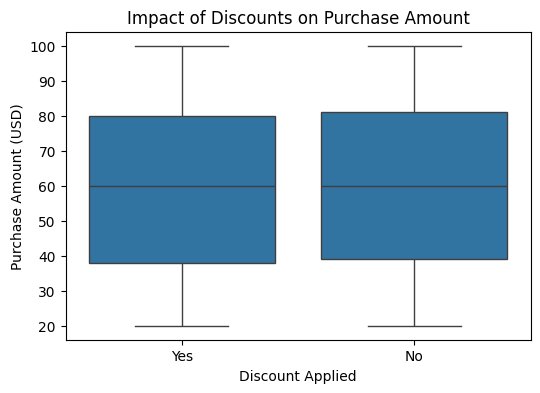

In [17]:
# Impact of discounts on purchase amount
plt.figure(figsize=(6, 4))
sns.boxplot(x="Discount Applied", y="Purchase Amount (USD)", data=df)
plt.title("Impact of Discounts on Purchase Amount")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\3053885475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Promo Code Used", data=df, palette="Set2")


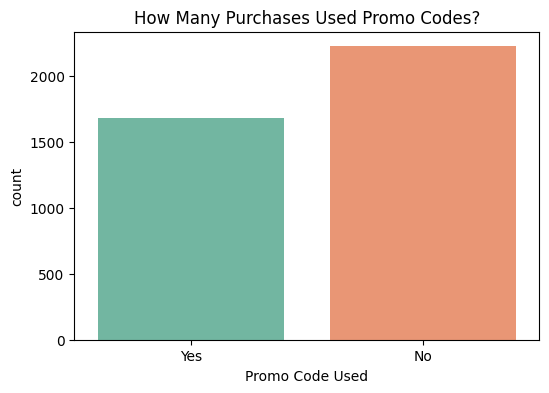

In [18]:
# Promo code usage
plt.figure(figsize=(6, 4))
sns.countplot(x="Promo Code Used", data=df, palette="Set2")
plt.title("How Many Purchases Used Promo Codes?")
plt.show()

# Preprocessing

In [19]:
unique_values = df['Frequency of Purchases'].unique().tolist()
print(unique_values)

['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly', 'Monthly', 'Every 3 Months']


In [20]:
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace('Every 3 Months', 'Quarterly')
unique_values = df['Frequency of Purchases'].unique().tolist()
print(unique_values)

['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly', 'Monthly']


In [21]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [22]:
# encoding categorical columns

# one hot encoding non-ordinal columns
df = pd.get_dummies(df, columns=['Gender', 'Season', 'Category'], drop_first=True)

# label encoding ordinal columns
le = LabelEncoder()
df['Subscription Status'] = le.fit_transform(df['Subscription Status'])

df['Discount Applied'] = le.fit_transform(df['Discount Applied'])

df['Promo Code Used'] = le.fit_transform(df['Promo Code Used'])

frequency_of_purchase_map = {'Annually': 0, 'Quarterly': 1, 'Monthly': 2, 'Bi-Weekly': 3, 'Weekly': 4, 'Fortnightly': 5}
df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_of_purchase_map)

df[df.select_dtypes(include=['bool']).columns] = df.select_dtypes(include=['bool']).astype(int)
    

In [23]:
df.head()

,Customer ID,Age,Item Purchased,Purchase Amount (USD),Location,Size,Color,Review Rating,Subscription Status,Shipping Type,...,Previous Purchases,Payment Method,Frequency of Purchases,Gender_Male,Season_Spring,Season_Summer,Season_Winter,Category_Clothing,Category_Footwear,Category_Outerwear
0,1,55,Blouse,53,Kentucky,L,Gray,3.1,1,Express,...,14,Venmo,5,1,0,0,1,1,0,0
1,2,19,Sweater,64,Maine,L,Maroon,3.1,1,Express,...,2,Cash,5,1,0,0,1,1,0,0
2,3,50,Jeans,73,Massachusetts,S,Maroon,3.1,1,Free Shipping,...,23,Credit Card,4,1,1,0,0,1,0,0
3,4,21,Sandals,90,Rhode Island,M,Maroon,3.5,1,Next Day Air,...,49,PayPal,4,1,1,0,0,0,1,0
4,5,45,Blouse,49,Oregon,M,Turquoise,2.7,1,Free Shipping,...,31,PayPal,0,1,1,0,0,1,0,0


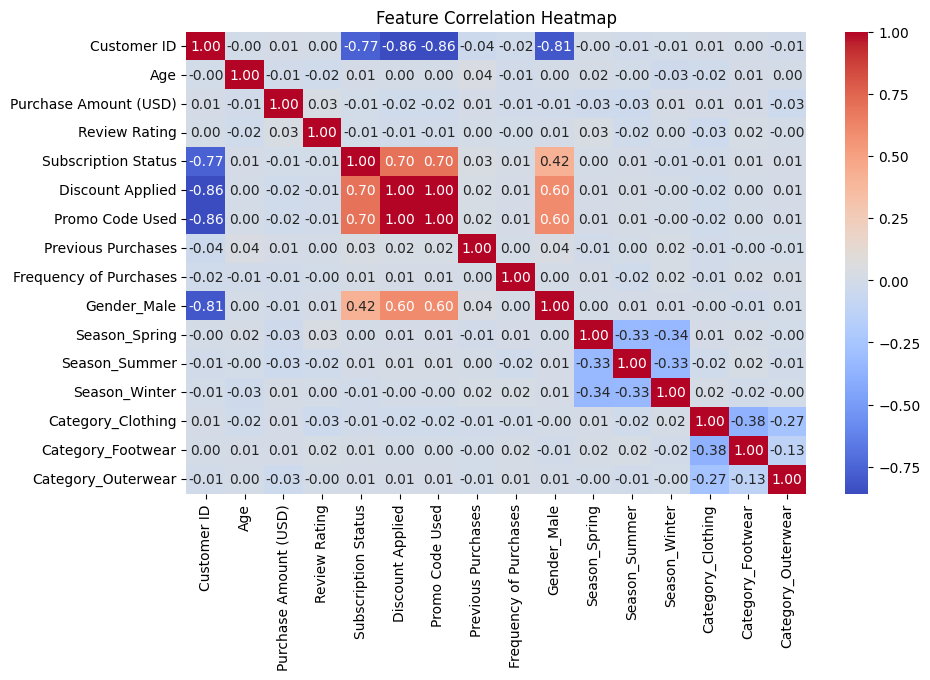

In [24]:
# Correlation heatmap

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Customer Segmentation using KMeans Clustering

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Item Purchased          3900 non-null   object 
 3   Purchase Amount (USD)   3900 non-null   int64  
 4   Location                3900 non-null   object 
 5   Size                    3900 non-null   object 
 6   Color                   3900 non-null   object 
 7   Review Rating           3900 non-null   float64
 8   Subscription Status     3900 non-null   int32  
 9   Shipping Type           3900 non-null   object 
 10  Discount Applied        3900 non-null   int32  
 11  Promo Code Used         3900 non-null   int32  
 12  Previous Purchases      3900 non-null   int64  
 13  Payment Method          3900 non-null   object 
 14  Frequency of Purchases  3900 non-null   

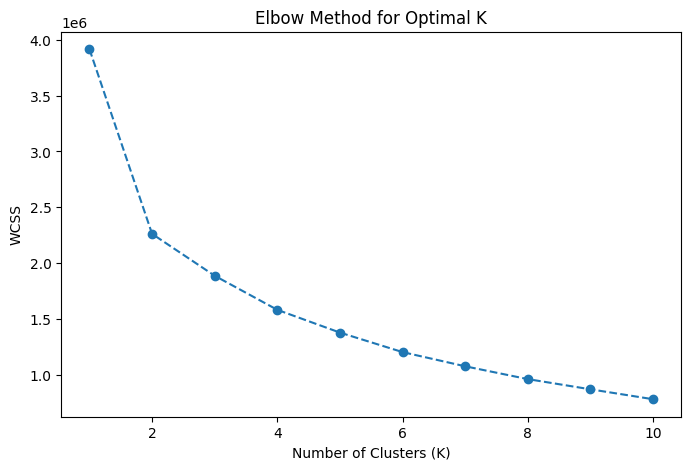

In [26]:
features = ['Age', 'Previous Purchases', 'Purchase Amount (USD)', 'Frequency of Purchases', 'Discount Applied', 'Promo Code Used', 'Subscription Status']

X = df[features]

seg_scaler = StandardScaler()
X_scaled = seg_scaler.fit_transform(X)

# Try different cluster sizes
wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

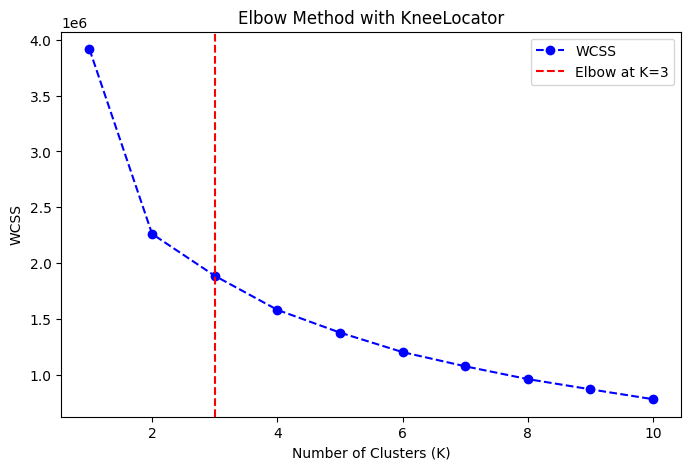

Optimal number of clusters (K): 3


In [27]:
# Example WCSS values (replace with your actual values) 
k_values = range(1, 11)  # K values from 1 to 10

# Find the knee/elbow point
kneedle = KneeLocator(k_values, wcss, curve="convex", direction="decreasing")

# Plot the elbow method with the identified knee point
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo--', label="WCSS")
plt.axvline(x=kneedle.elbow, color='r', linestyle='--', label=f"Elbow at K={kneedle.elbow}")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method with KneeLocator")
plt.legend()
plt.show()

print(f"Optimal number of clusters (K): {kneedle.elbow}")

In [28]:
# Apply K-Means with chosen K
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Check the distribution of customers in each segment
print(df["Cluster"].value_counts())

Cluster
1    1739
0    1107
2    1054
Name: count, dtype: int64


In [29]:
cluster_summary = df.groupby("Cluster")[["Previous Purchases", "Purchase Amount (USD)"]].mean()
print(cluster_summary)

         Previous Purchases  Purchase Amount (USD)
Cluster                                           
0                 24.738934              76.660343
1                 25.205290              37.034503
2                 26.236243              79.520873


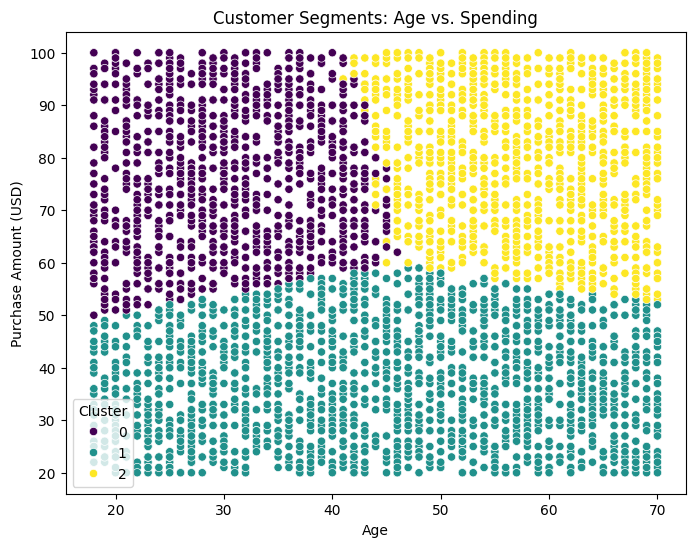

In [30]:
# Vizualizing customer segments

# Cluster distribution by age and spending

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Age"], y=df["Purchase Amount (USD)"], hue=df["Cluster"], palette="viridis")
plt.title("Customer Segments: Age vs. Spending")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show()

## Interpretation of the Scatter Plot: Customer Segments (Age vs. Spending)

### Axes Explanation:

X-axis (Age): Represents the age of customers, ranging from approximately 20 to 70 years.
Y-axis (Purchase Amount (USD)): Represents how much a customer spends, ranging from $20 to $100.

Colors: Represent different clusters (customer segments), where:
Cluster 0 (Purple): Younger customers (mostly below ~45) who spend more.
Cluster 1 (Teal): Customers across all age groups who spend less.
Cluster 2 (Yellow): Older customers (mostly above ~45) who spend more.

## Key Observations:

### High-Spending Young Customers (Cluster 0 - Purple):

Customers below ~45 years who have a high purchase amount.
This group might include loyal customers or those who buy high-value items frequently.
Could be influenced by trendy products, subscriptions, or promotions.

### Lower-Spending Customers (Cluster 1 - Teal):

Customers from all age groups who consistently spend less (~$20–$50 range).
This group likely includes occasional shoppers or budget-conscious buyers.
Might respond well to discounts and promotional offers.

### High-Spending Older Customers (Cluster 2 - Yellow):

Customers above ~45 years who have high purchase amounts.
Could be brand-loyal or higher-income customers purchasing premium products.
This group might respond well to personalized recommendations or exclusive deals.

## Business Implications & Marketing Strategies:

                          	                    
### Cluster 0 (Purple):
Characteristics - Young high-spenders;
Possible Marketing Strategy - Offer trend-based promotions, early access to new products, and premium membership programs.

### Cluster 1 (Teal):
Characteristics - Low spenders across all ages	    
Possible Marketing Strategy - Target with budget-friendly deals, discount-based promotions, and seasonal sales to increase spending.

### Cluster 2 (Yellow):	              
Characteristics - Older high-spenders	        
Possible Marketing Strategy - Focus on premium services, loyalty rewards, and personalized recommendations.

# Predicting Purchase Probability using Logistic Regression

In [42]:
pd.options.display.max_columns = None

In [43]:
df['Purchase Probability'] = df['Cluster'].map(lambda x: 1 if x in [0, 2] else 0)

# df['Purchase Probability'] = df['Cluster'].map(lambda x: 1 if x in [0, 2] else 0)

df.head()

,Customer ID,Age,Item Purchased,Purchase Amount (USD),Location,Size,Color,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Gender_Male,Season_Spring,Season_Summer,Season_Winter,Category_Clothing,Category_Footwear,Category_Outerwear,Cluster,Purchase Probability
0,1,55,Blouse,53,Kentucky,L,Gray,3.1,1,Express,1,1,14,Venmo,5,1,0,0,1,1,0,0,1,0
1,2,19,Sweater,64,Maine,L,Maroon,3.1,1,Express,1,1,2,Cash,5,1,0,0,1,1,0,0,0,1
2,3,50,Jeans,73,Massachusetts,S,Maroon,3.1,1,Free Shipping,1,1,23,Credit Card,4,1,1,0,0,1,0,0,2,1
3,4,21,Sandals,90,Rhode Island,M,Maroon,3.5,1,Next Day Air,1,1,49,PayPal,4,1,1,0,0,0,1,0,0,1
4,5,45,Blouse,49,Oregon,M,Turquoise,2.7,1,Free Shipping,1,1,31,PayPal,0,1,1,0,0,1,0,0,1,0


In [32]:
# Define the features
features = ["Age", "Previous Purchases", "Purchase Amount (USD)", "Frequency of Purchases",
    "Discount Applied", "Promo Code Used", "Subscription Status", "Review Rating", "Purchase Probability"]

data = df[features].copy()  # Copy to avoid modifying the original DataFrame

# Standardizing numerical columns properly
prob_scaler = StandardScaler()
data[["Age", "Previous Purchases", "Purchase Amount (USD)", "Review Rating"]] = prob_scaler.fit_transform(
    data[["Age", "Previous Purchases", "Purchase Amount (USD)", "Review Rating"]]
)

# Splitting features and target variable
X = data.drop("Purchase Probability", axis=1)
y = data["Purchase Probability"]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (3120, 8)
Test data shape: (780, 8)


In [33]:
# Train Logistic Regression model

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Accuracy: 0.9769230769230769


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.97      0.97       348
           1       0.97      0.99      0.98       432

    accuracy                           0.98       780
   macro avg       0.98      0.98      0.98       780
weighted avg       0.98      0.98      0.98       780



In [34]:
# To check overfitting of the model

# Training Accuracy
train_accuracy = lr_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Test Accuracy
test_accuracy = lr_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5)

# Print mean and standard deviation
print("Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(cv_scores.mean(), cv_scores.std()))

y_pred = lr_model.predict(X_test)
print("Standard Deviation of Predictions:", np.std(y_pred))

Training Accuracy: 0.9762820512820513
Test Accuracy: 0.9769230769230769
Cross-Validation Accuracy: 0.98 ± 0.00
Standard Deviation of Predictions: 0.49619856685754277


In [35]:
# Train Random Forest model

rf_model = RandomForestClassifier(n_estimators=50, max_depth = 10, min_samples_split=5, max_features="sqrt", random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9846153846153847


Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98       348
           1       0.98      0.99      0.99       432

    accuracy                           0.98       780
   macro avg       0.99      0.98      0.98       780
weighted avg       0.98      0.98      0.98       780



In [36]:
# To check overfitting of the model

# Training Accuracy
train_accuracy = rf_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Test Accuracy
test_accuracy = rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print mean and standard deviation
print("Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(cv_scores.mean(), cv_scores.std()))

y_pred = rf_model.predict(X_test)
print("Standard Deviation of Predictions:", np.std(y_pred))

Training Accuracy: 0.9983974358974359
Test Accuracy: 0.9846153846153847
Cross-Validation Accuracy: 0.99 ± 0.00
Standard Deviation of Predictions: 0.49650984379321567


Feature: Age, Importance: 0.5130988558321578
Feature: Previous Purchases, Importance: 0.0028961479916785743
Feature: Purchase Amount (USD), Importance: 9.926864014534555
Feature: Frequency of Purchases, Importance: 0.10196337261583778
Feature: Discount Applied, Importance: 0.009459646079328546
Feature: Promo Code Used, Importance: 0.009459646079328546
Feature: Subscription Status, Importance: 0.34619251007006596
Feature: Review Rating, Importance: 0.029225624859953052


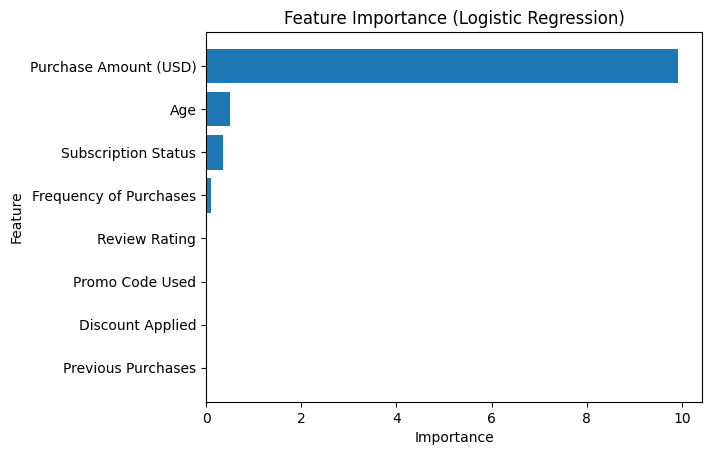

In [37]:
# Feature Importance of Logistic Regression

coefficients = lr_model.coef_[0]  # For binary classification, first class's coefficients

importance = np.abs(coefficients)
feature_names = X.columns
sorted_idx = np.argsort(importance)[::-1]

# Print feature names and their importance
for feature, importance_score in zip(feature_names, importance):
    print(f"Feature: {feature}, Importance: {importance_score}")

sorted_idx = np.argsort(importance)

# Plot the feature importances
plt.barh(np.array(feature_names)[sorted_idx], importance[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

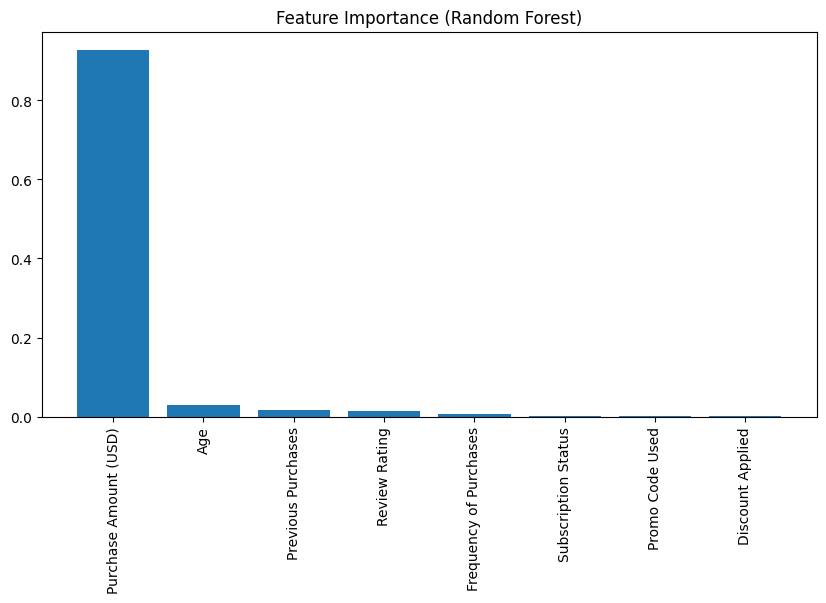

In [38]:
# Feature Importance of Random Forest Classifier

importances = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()


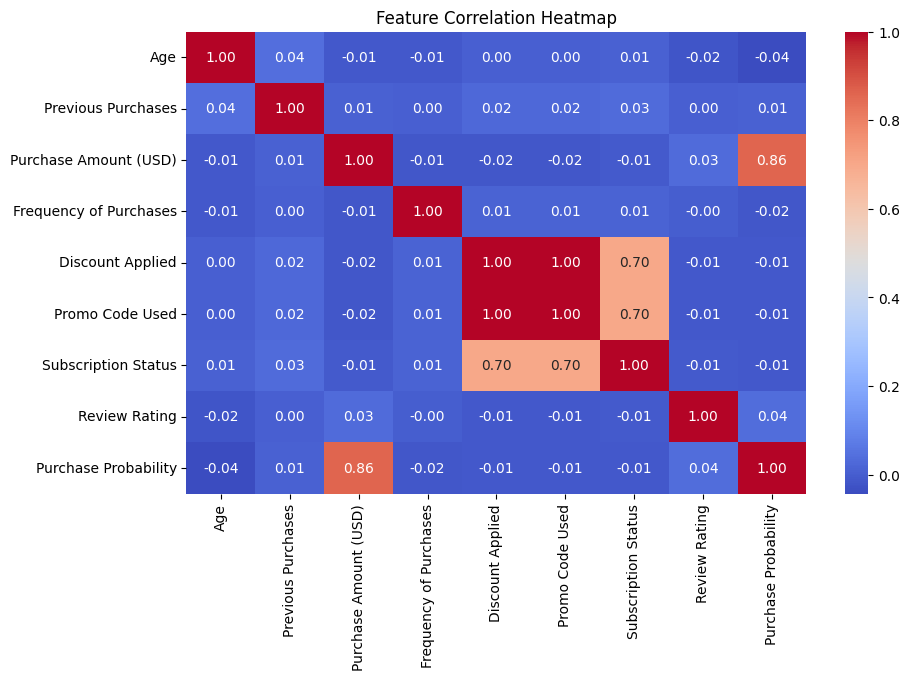

In [39]:
#Correlation heatmap

numeric_df = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Insights

### Model Accuracy

Logistic Regression has accuracy of 97.4% with no major signs of overfitting.

Random Forest Classifier has accuracy of 98.2%, which is better than Logistic Regression, but the model is slightly overfitting since the training accuracy is almost equal to one.

Initially, the training accuracy was equal to one, when we kept the tree depth as (n_estimators) as 100, but on reducing it to 50 and tuning these parameters; reducing tree depth(max_depth = 10), Increase minimum samples per split(min_samples_split=5), and considering fewer features per split - regularization(max_features="sqrt")  helped us reduce the training accuracy to 0.997, which is still very high.

### Feature Importance

Logistic Regression distributes features more evenly when compared to Random Forest Classifier.

From the above Correlation map we can say that, Purchase Amount (USD) is highly correlated with the target, hence it is more dominant.

In [40]:
# Ensure the folder exists
os.makedirs("models", exist_ok=True)

seg_model_and_scaler = {
    "model": kmeans,
    "scaler": seg_scaler
}

prob_model_and_scaler = {
    "model": lr_model,
    "scaler": prob_scaler
}

# Save the clustering model
joblib.dump(seg_model_and_scaler, "models/customer_segmentation_with_scaler.pkl")

# Save the classification model
joblib.dump(prob_model_and_scaler, "models/purchase_probability_with_scaler.pkl")

print("Models saved successfully in the folder.")

Models saved successfully in the folder.
